In [71]:
import pandas as pd
import numpy as np

data = pd.read_excel("D:\Indian Unicorn startups 2023 updated1.xlsx")  # Adjust filename if needed
print(data)

                         Company        Sector                    Sector1  \
0                       Flipkart  E - Commerce                   Commerce   
1                          BYJUS        Edtech                        NaN   
2                          PayTM       Fintech          Payments & Wallet   
3                       PhonePe^       Fintech                   Payments   
4                          Swigg      Foodtech                        NaN   
..                           ...           ...                        ...   
97              Amagi Media Labs          SaaS        Local Ads Targeting   
98      Oxyzo Financial Services       Fintech  Marketplace - SME Lending   
99   Open Financial Technologies       Fintech                   Neo Bank   
100                   Leadsquare          SaaS                        CRM   
101                      Blinkit  E - Commerce       Commerce - Groceries   

     Entry_Valuation^^ ($B)  Valuation ($B)      Entry Entry_Month  \
0    

In [7]:
print(data.head())  # Preview the first 5 rows

    Company        Sector            Sector1  Entry_Valuation^^ ($B)  \
0  Flipkart  E - Commerce           Commerce                     1.0   
1     BYJUS        Edtech                NaN                     1.0   
2     PayTM       Fintech  Payments & Wallet                     1.7   
3  PhonePe^       Fintech           Payments                     5.5   
4     Swigg      Foodtech                NaN                     1.4   

   Valuation ($B)      Entry Entry_Month  Entry_Year             Location  \
0            37.6 2012-02-01    February        2012  Bangalore/Singapore   
1            22.0 2018-01-01     January        2018            Bangalore   
2            16.0 2015-02-01    February        2015                Noida   
3            12.0 2020-12-01    December        2020            Bangalore   
4            10.7 2018-06-01        June        2018            Bangalore   

   No_of_Location                                   Select_Investors  \
0               2    Accel, Tige

In [8]:
print(data.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Company                 102 non-null    object        
 1   Sector                  102 non-null    object        
 2   Sector1                 83 non-null     object        
 3   Entry_Valuation^^ ($B)  102 non-null    float64       
 4   Valuation ($B)          102 non-null    float64       
 5   Entry                   102 non-null    datetime64[ns]
 6   Entry_Month             102 non-null    object        
 7   Entry_Year              102 non-null    int64         
 8   Location                102 non-null    object        
 9   No_of_Location          102 non-null    int64         
 10  Select_Investors        102 non-null    object        
 11  No of invester          102 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object

In [9]:
print(data.describe())  # Summary statistics for numeric columns

       Entry_Valuation^^ ($B)  Valuation ($B)                          Entry  \
count              102.000000      102.000000                            102   
mean                 1.547549        3.398020  2020-06-19 11:45:52.941176576   
min                  1.000000        0.568000            2011-09-01 00:00:00   
25%                  1.000000        1.200000            2019-07-16 12:00:00   
50%                  1.200000        1.850000            2021-05-01 00:00:00   
75%                  1.582500        3.475000            2021-11-01 00:00:00   
max                 10.000000       37.600000            2022-09-01 00:00:00   
std                  1.138013        4.710657                            NaN   

        Entry_Year  No_of_Location  No of invester  
count   102.000000      102.000000      102.000000  
mean   2020.029412        1.205882        4.294118  
min    2011.000000        1.000000        2.000000  
25%    2019.000000        1.000000        4.000000  
50%    2021.00

In [10]:
print(data.isnull().sum())  # Check for missing values

Company                    0
Sector                     0
Sector1                   19
Entry_Valuation^^ ($B)     0
Valuation ($B)             0
Entry                      0
Entry_Month                0
Entry_Year                 0
Location                   0
No_of_Location             0
Select_Investors           0
No of invester             0
dtype: int64


In [11]:
data.rename(columns={'Entry_Valuation^^ ($B)': 'Entry_Valuation', 'No of invester': 'No_of_Investors'}, inplace=True)
data.fillna(value={'No_of_Investors': 0}, inplace=True)  # Example for filling missing investor count
print(data)

                         Company        Sector                    Sector1  \
0                       Flipkart  E - Commerce                   Commerce   
1                          BYJUS        Edtech                        NaN   
2                          PayTM       Fintech          Payments & Wallet   
3                       PhonePe^       Fintech                   Payments   
4                          Swigg      Foodtech                        NaN   
..                           ...           ...                        ...   
97              Amagi Media Labs          SaaS        Local Ads Targeting   
98      Oxyzo Financial Services       Fintech  Marketplace - SME Lending   
99   Open Financial Technologies       Fintech                   Neo Bank   
100                   Leadsquare          SaaS                        CRM   
101                      Blinkit  E - Commerce       Commerce - Groceries   

     Entry_Valuation  Valuation ($B)      Entry Entry_Month  Entry_Year  \


In [12]:
data['Entry'] = pd.to_datetime(data['Entry'])

In [21]:
# Group by 'Sector' and count the number of companies in each sector
gp = data.groupby('Sector').agg({'Company': 'count'})

# Sort the result by the count in descending order

print(gp.sort_values(by='Company', ascending=False).head(5)) # Display the top 5 sectors by company count

              Company
Sector               
Fintech            17
SaaS               16
E - Commerce       13
Marketplace         9
Edtech              7


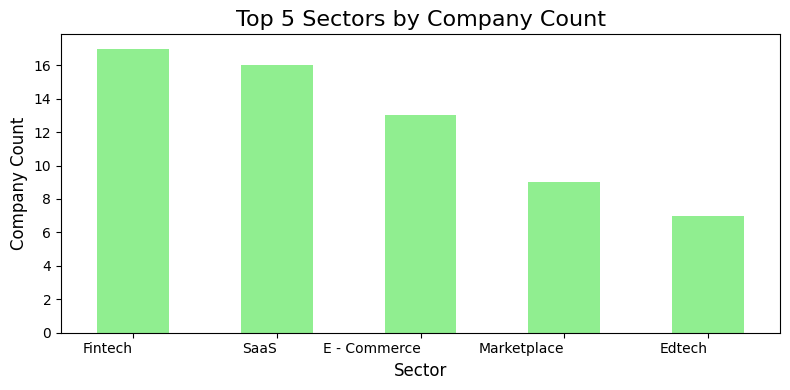

In [109]:
import matplotlib.pyplot as plt

# Group by 'Sector' and count the number of companies
gp = data.groupby('Sector').agg({'Company': 'count'})

# Sort the result by the count in descending order and get the top 5 sectors
top_5_sectors = gp.sort_values(by='Company', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(8, 4))
top_5_sectors['Company'].plot(kind='bar', color='lightgreen')

# Add titles and labels
plt.title('Top 5 Sectors by Company Count', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Company Count', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=360, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
gp = data.groupby('Location').agg({'Company': 'count'})

# Sort the result by the count in descending order

print(gp.sort_values(by = 'Company', ascending=False).head(5)) #Display the top 5 Location by company count

           Company
Location          
Bangalore       34
Gurgaon         14
Mumbai          12
Delhi            7
Pune             4


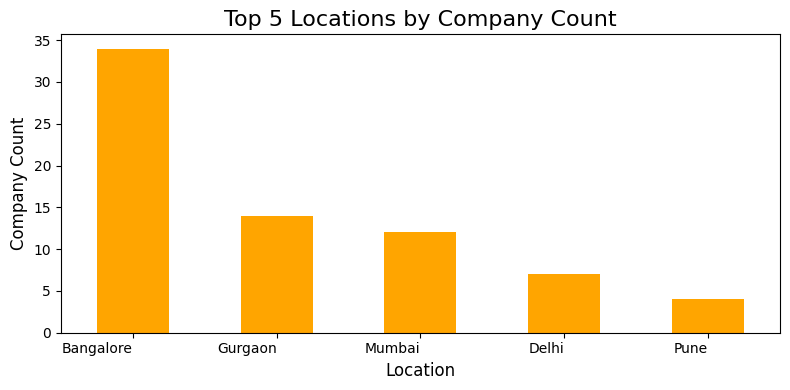

In [108]:
import matplotlib.pyplot as plt

# Group by 'Location' and count the number of companies
gp = data.groupby('Location').agg({'Company': 'count'})

# Sort the result by the count in descending order and get the top 5 locations
top_5_locations = gp.sort_values(by='Company', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(8, 4))
top_5_locations['Company'].plot(kind='bar', color='orange')

# Add titles and labels
plt.title('Top 5 Locations by Company Count', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Company Count', fontsize=12)

# Display the plot
plt.xticks(rotation=360, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [80]:
data['Company'] = data['Company'].replace('PhonePe^', 'PhonePe')
data['Company'] = data['Company'].replace('Dream1', 'Dream11')
gp = data.groupby('Company').agg({'Valuation ($B)': 'sum'})
# Sort by 'Valuation ($B)' in descending order and get the top 10 companies
top_10_companies = gp.sort_values(by='Valuation ($B)', ascending=False).head(10)
print(top_10_companies)

          Valuation ($B)
Company                 
Flipkart            37.6
BYJUS               22.0
PayTM               16.0
PhonePe             12.0
Swigg               10.7
Polygo              10.0
OYO Room             9.6
Dream11              8.0
RazorPay             7.5
Ola Cabs             7.3


In [93]:
print(data.sort_values(by='Entry_Year', ascending=True)[['Company', 'Entry_Year']].head(10))

      Company  Entry_Year
89     InMobi        2011
0    Flipkart        2012
57   Mu Sigma        2013
41   Snapdeal        2014
13     Zomato        2015
9    Ola Cabs        2015
2       PayTM        2015
58      Quikr        2015
79  ShopClues        2016
62       Hike        2016


In [28]:
print(np.isinf(data['Valuation ($B)']).sum())

0


In [29]:
data['Valuation ($B)'] = data['Valuation ($B)'].replace([np.inf, -np.inf], np.nan)

In [31]:
data.dropna(subset=['Valuation ($B)'], inplace=True)

In [47]:
# Replace inf/-inf with NaN
data['Valuation ($B)'] = data['Valuation ($B)'].replace([np.inf, -np.inf], np.nan)

# Fill NaN with the mean value
data['Valuation ($B)'] = data['Valuation ($B)'].fillna(data['Valuation ($B)'].mean())

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

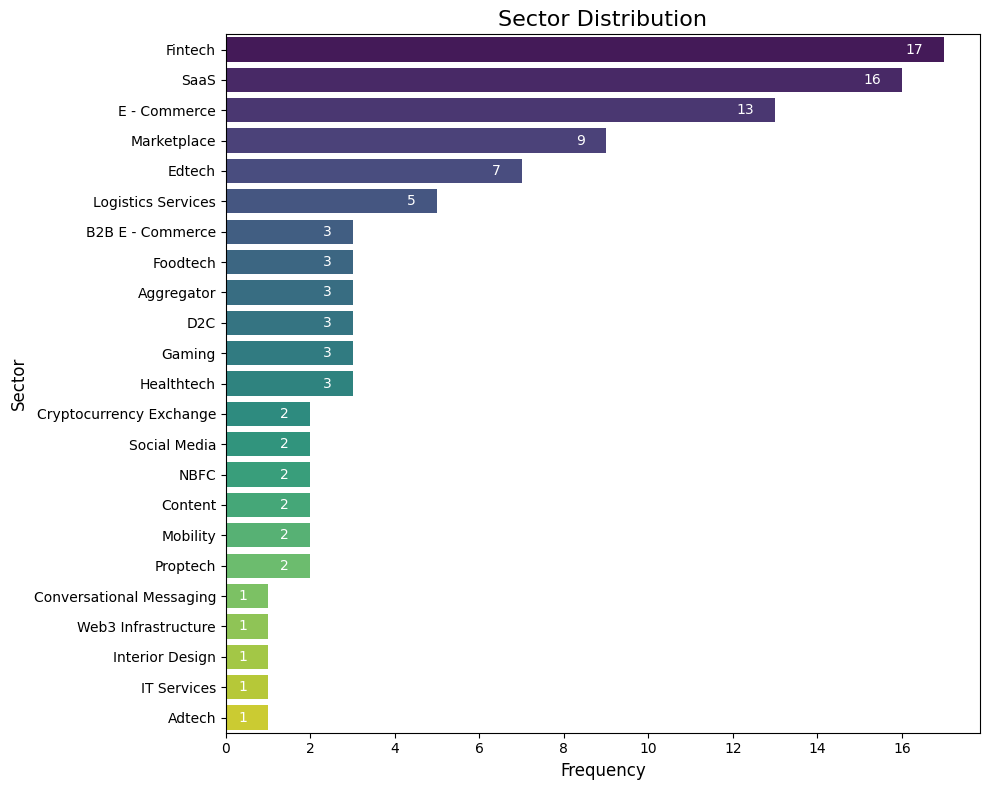

In [57]:
# Create the horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
ax = sns.countplot(y=data['Sector'], order=data['Sector'].value_counts().index, palette='viridis')

# Add data labels
for i, count in enumerate(data['Sector'].value_counts()):
    plt.text(count - 0.5, i, str(count), va='center', ha='right', color='white', fontsize=10)

# Customize the chart
plt.title('Sector Distribution', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.tight_layout()
plt.show()

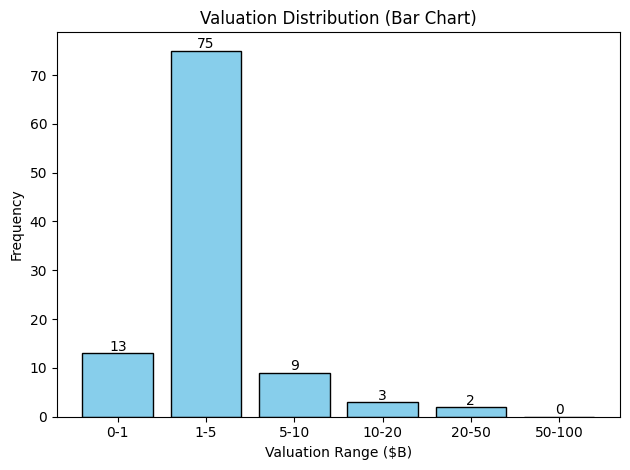

In [107]:
# Clean the data: Replace inf/-inf with NaN and fill NaN values with the mean
data['Valuation ($B)'] = data['Valuation ($B)'].replace([np.inf, -np.inf], np.nan)
data['Valuation ($B)'] = data['Valuation ($B)'].fillna(data['Valuation ($B)'].mean())

# Create bins and categorize the data into those bins
bins = [0, 1, 5, 10, 20, 50, 100]  # Define valuation ranges
labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100']
data['Valuation_Range'] = pd.cut(data['Valuation ($B)'], bins=bins, labels=labels, include_lowest=True)

# Count the frequency for each range
valuation_counts = data['Valuation_Range'].value_counts().sort_index()

# Plot the bar chart
plt.bar(valuation_counts.index, valuation_counts.values, color='skyblue', edgecolor='black')

# Add data labels to each bar
for i, value in enumerate(valuation_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)  # Adjusting label position

# Customize the chart
plt.title('Valuation Distribution (Bar Chart)')
plt.xlabel('Valuation Range ($B)')
plt.ylabel('Frequency')
plt.xticks(rotation=360)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

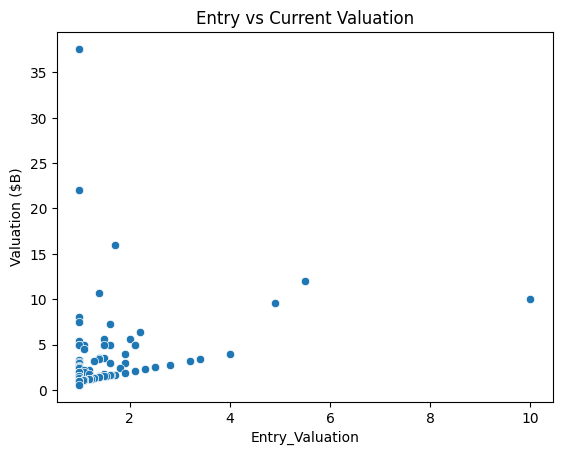

In [42]:
sns.scatterplot(x='Entry_Valuation', y='Valuation ($B)', data=data)
plt.title('Entry vs Current Valuation')
plt.show()

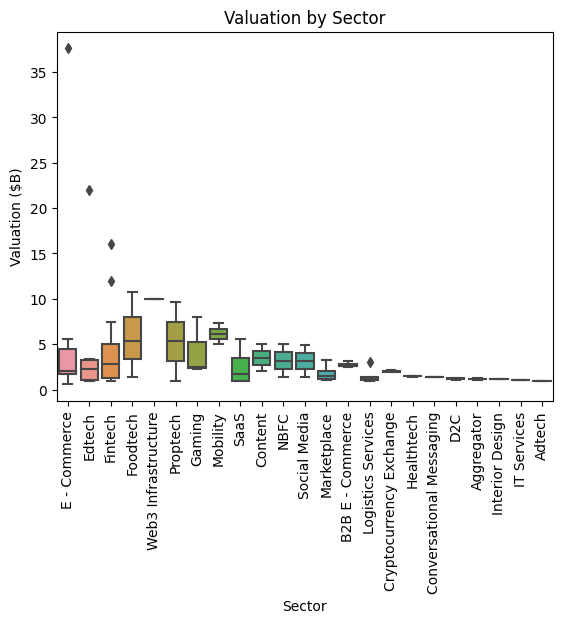

In [43]:
sns.boxplot(x='Sector', y='Valuation ($B)', data=data)
plt.xticks(rotation=90)
plt.title('Valuation by Sector')
plt.show()

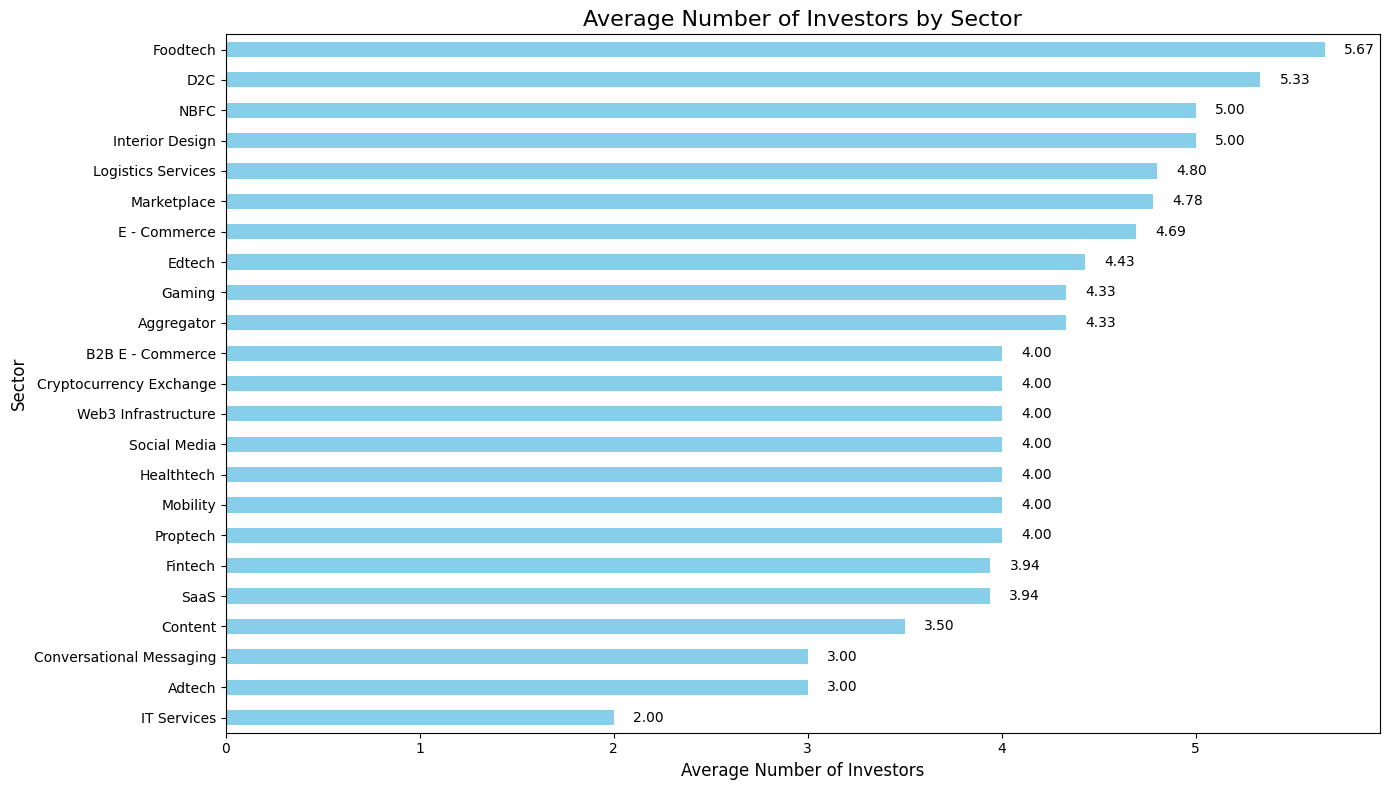

In [65]:
# Create the horizontal bar chart
avg_investors = data.groupby('Sector')['No_of_Investors'].mean().sort_values()
ax = avg_investors.plot(kind='barh', color='skyblue', figsize=(14, 8))

# Add data labels
for index, value in enumerate(avg_investors):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center', fontsize=10)

# Customize the chart
plt.title('Average Number of Investors by Sector', fontsize=16)
plt.xlabel('Average Number of Investors', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.tight_layout()
plt.show()

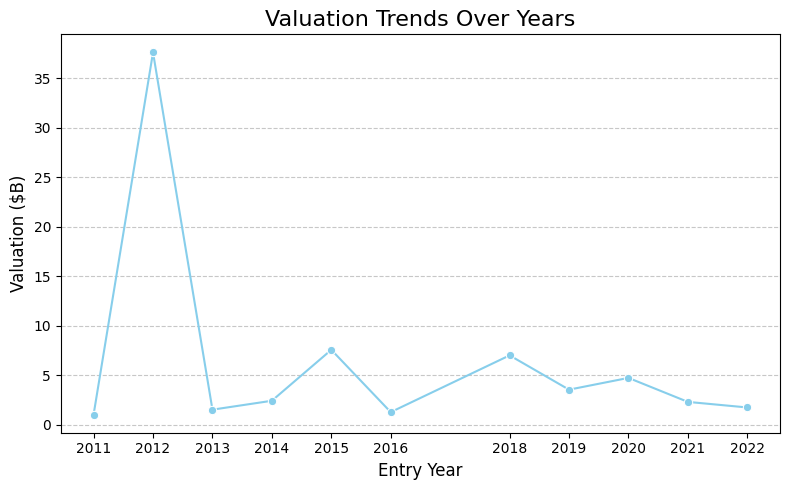

In [70]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Clean the data: Replace inf/-inf with NaN and fill NaN values
data['Valuation ($B)'] = data['Valuation ($B)'].replace([np.inf, -np.inf], np.nan)
data['Valuation ($B)'] = data['Valuation ($B)'].fillna(data['Valuation ($B)'].mean())

# Sort data by Entry_Year
data_sorted = data.sort_values(by='Entry_Year')

# Plot the line chart
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='Entry_Year',
    y='Valuation ($B)',
    data=data_sorted,
    errorbar=None,  # Replaces ci=None
    marker='o',
    color='skyblue'
)
plt.title('Valuation Trends Over Years', fontsize=16)
plt.xlabel('Entry Year', fontsize=12)
plt.ylabel('Valuation ($B)', fontsize=12)
plt.xticks(data_sorted['Entry_Year'].unique())  # Ensure all years are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

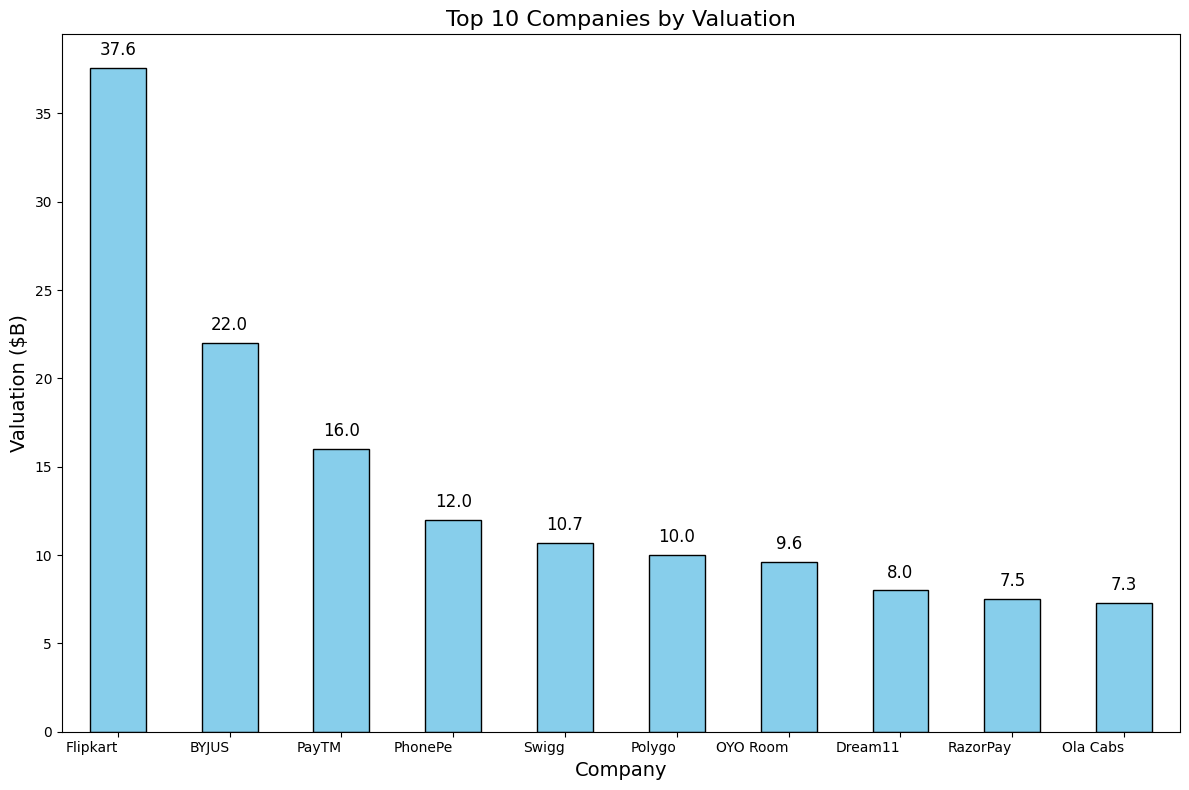

In [110]:
# Replace incorrect company names
data['Company'] = data['Company'].replace('PhonePe^', 'PhonePe')
data['Company'] = data['Company'].replace('Dream1', 'Dream11')

# Group by Company and sum the Valuation ($B)
gp = data.groupby('Company').agg({'Valuation ($B)': 'sum'})

# Sort by 'Valuation ($B)' in descending order and get the top 10 companies
top_10_companies = gp.sort_values(by='Valuation ($B)', ascending=False).head(10)

# Plot the top 10 companies by valuation
plt.figure(figsize=(12, 8))
ax = top_10_companies['Valuation ($B)'].plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Companies by Valuation', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Valuation ($B)', fontsize=14)
plt.xticks(rotation=360, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit

# Add data labels on top of each bar
for i, v in enumerate(top_10_companies['Valuation ($B)']):
    ax.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

# conclusion

1. Bangalore is the hub for unicorns, housing 34 companies, followed by Gurgaon and Mumbai.
2. The Fintech sector boasts the highest number of unicorns. 
3. Foodtech has the largest valuation among all sectors.
4. The Foodtech sector also has the highest average number of investors, with an average of 5.67 investors per company.
5. Approximately 75 unicorns are valued between 1 billion and 5 billion dollars.
6. Flipkart holds the highest valuation among the unicorn companies, with a valuation of 37.6 billion.
7. InMobi was the first company to be included in the list of unicorn companies.